In [58]:
import numpy as np
import pandas as pd

import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from matplotlib import pyplot as plt
plt.style.use('dark_background')

In [59]:
data = pd.read_csv('dataset_comb.csv')
data.head()
X = np.array(data[['Area','MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'EquivDiameter',  'Extent', 'Perimeter', 'Roundness', 'AspectRation']])
y = np.array(data['Class'])

In [75]:
def train_evaluate(model):
    accs = []
    kf = KFold(n_splits=7, shuffle=True, random_state=2021)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        scaler = MinMaxScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        model.fit(X_train, y_train)
        accs.append(model.score(X_test, y_test))
        
    return accs

In [96]:
linear_disc = LinearDiscriminantAnalysis()
linear_disc_scores = train_evaluate(linear_disc)

In [97]:
perceptron = Perceptron()
perceptron_scores = train_evaluate(perceptron)

In [98]:
nb = GaussianNB()
nb_scores = train_evaluate(nb)

In [99]:
lr = LogisticRegression()
lr_scores = train_evaluate(lr)

In [100]:
ann = MLPClassifier(alpha=0.02, max_iter=10000)
ann_scores = train_evaluate(ann)

In [101]:
svc = SVC()
svc_scores = train_evaluate(svc)

Text(0.5, 1.0, 'Support Vector Classifier: 98.9662')

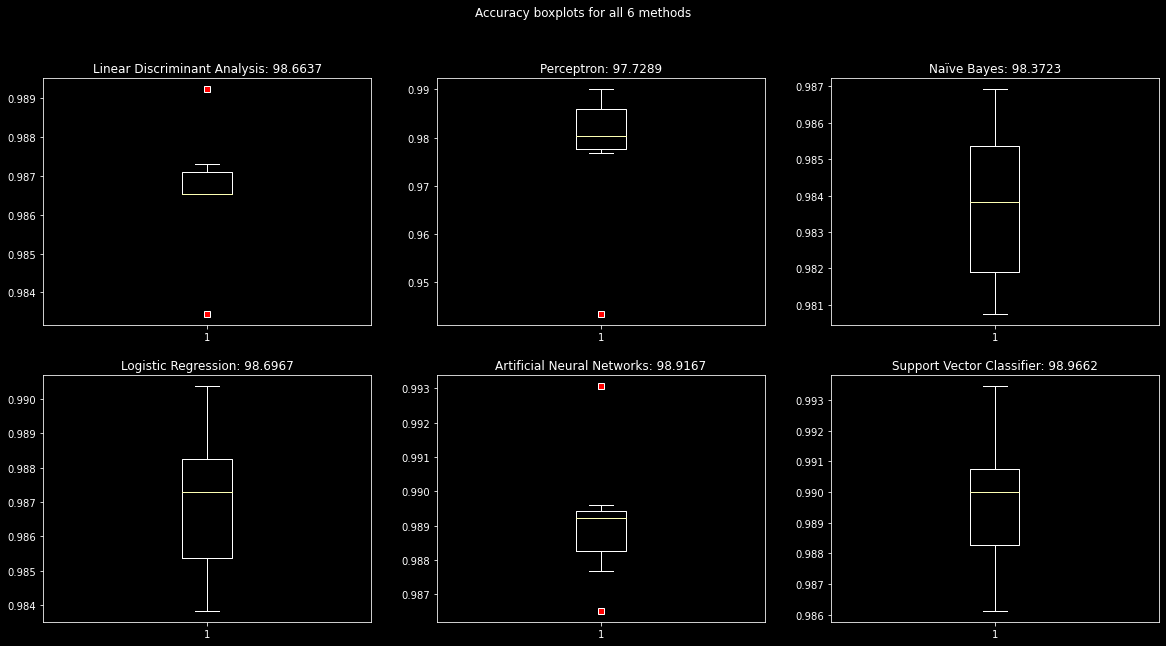

In [102]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle('Accuracy boxplots for all 6 methods')
axs[0, 0].boxplot(linear_disc_scores, flierprops=dict(markerfacecolor='r', marker='s'))
axs[0, 1].boxplot(perceptron_scores, flierprops=dict(markerfacecolor='r', marker='s'))
axs[0, 2].boxplot(nb_scores, flierprops=dict(markerfacecolor='r', marker='s'))
axs[1, 0].boxplot(lr_scores, flierprops=dict(markerfacecolor='r', marker='s'))
axs[1, 1].boxplot(ann_scores, flierprops=dict(markerfacecolor='r', marker='s'))
axs[1, 2].boxplot(svc_scores, flierprops=dict(markerfacecolor='r', marker='s'))
axs[0, 0].set_title(f'Linear Discriminant Analysis: {round(np.mean(linear_disc_scores), 6) * 100}')
axs[0, 1].set_title(f'Perceptron: {round(np.mean(perceptron_scores), 6) * 100}')
axs[0, 2].set_title(f'Naïve Bayes: {round(np.mean(nb_scores), 6) * 100}')
axs[1, 0].set_title(f'Logistic Regression: {round(np.mean(lr_scores), 6) * 100}')
axs[1, 1].set_title(f'Artificial Neural Networks: {round(np.mean(ann_scores), 6) * 100}')
axs[1, 2].set_title(f'Support Vector Classifier: {round(np.mean(svc_scores), 6) * 100}')